In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
x = np.loadtxt('./data/weightedX.csv').reshape(-1,1)
y = np.loadtxt('./data/weightedY.csv').reshape(-1,1)

x = (x - np.mean(x))/np.std(x)                  # Normalize
x = np.concatenate((np.ones(x.shape),x),axis=1)

In [3]:
def gen_uniq_floats(lo, hi, n):
    out = np.empty(n)
    needed = n
    while needed != 0:
        arr = np.random.uniform(lo, hi, needed)
        uniqs = np.setdiff1d(np.unique(arr), out[:n-needed])
        out[n-needed: n-needed+uniqs.size] = uniqs
        needed -= uniqs.size
    np.random.shuffle(out)
    return out

Final Parameters - [1.03128116],[0.83519315]


<IPython.core.display.Javascript object>


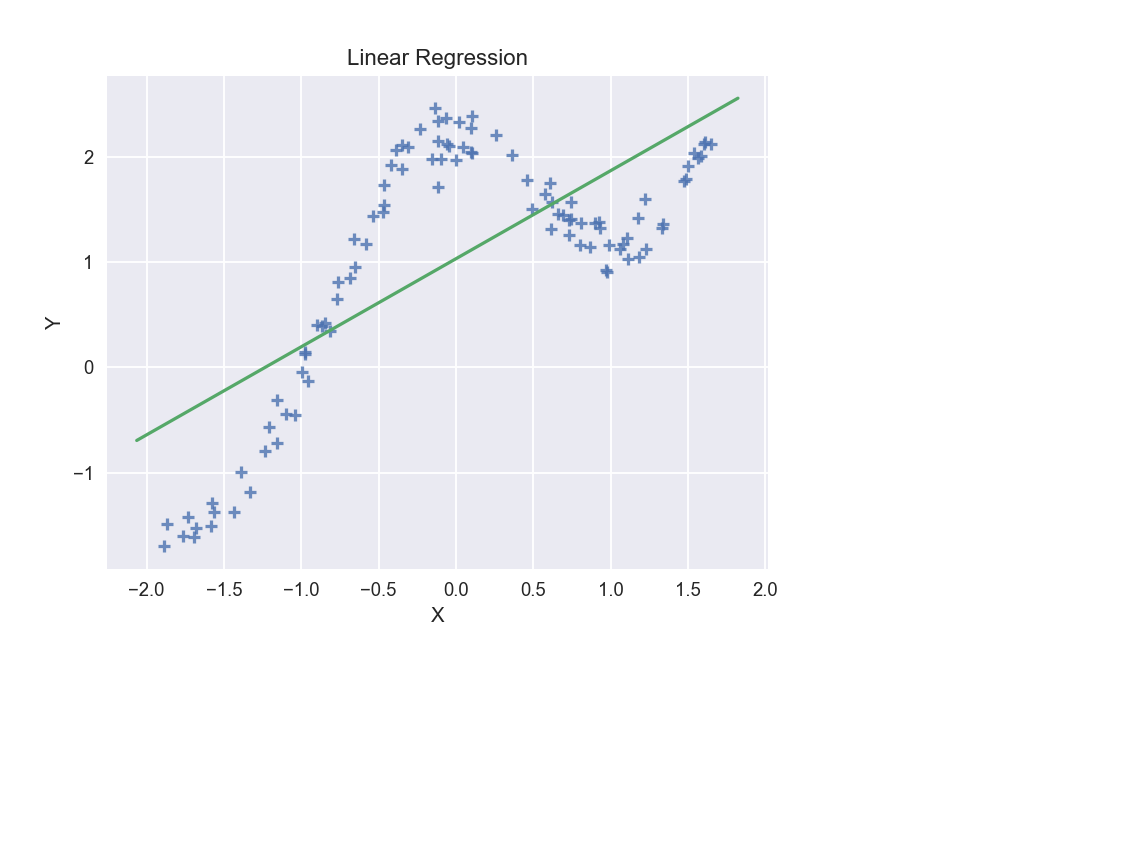

In [4]:
%matplotlib notebook

normal_theta = np.dot(np.dot(np.linalg.pinv(np.dot(x.T,x)),x.T),y)

print("Final Parameters - {0},{1}".format(normal_theta[0],normal_theta[1]))

# theta[0] = 1.03128116
# theta[1] = 0.83519315

sns.set()
sns.regplot(x[:,1],y.ravel(),fit_reg=False,marker='+')
axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = normal_theta[0] + normal_theta[1] * x_vals
plt.plot(x_vals,y_vals)
plt.title("Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

<IPython.core.display.Javascript object>


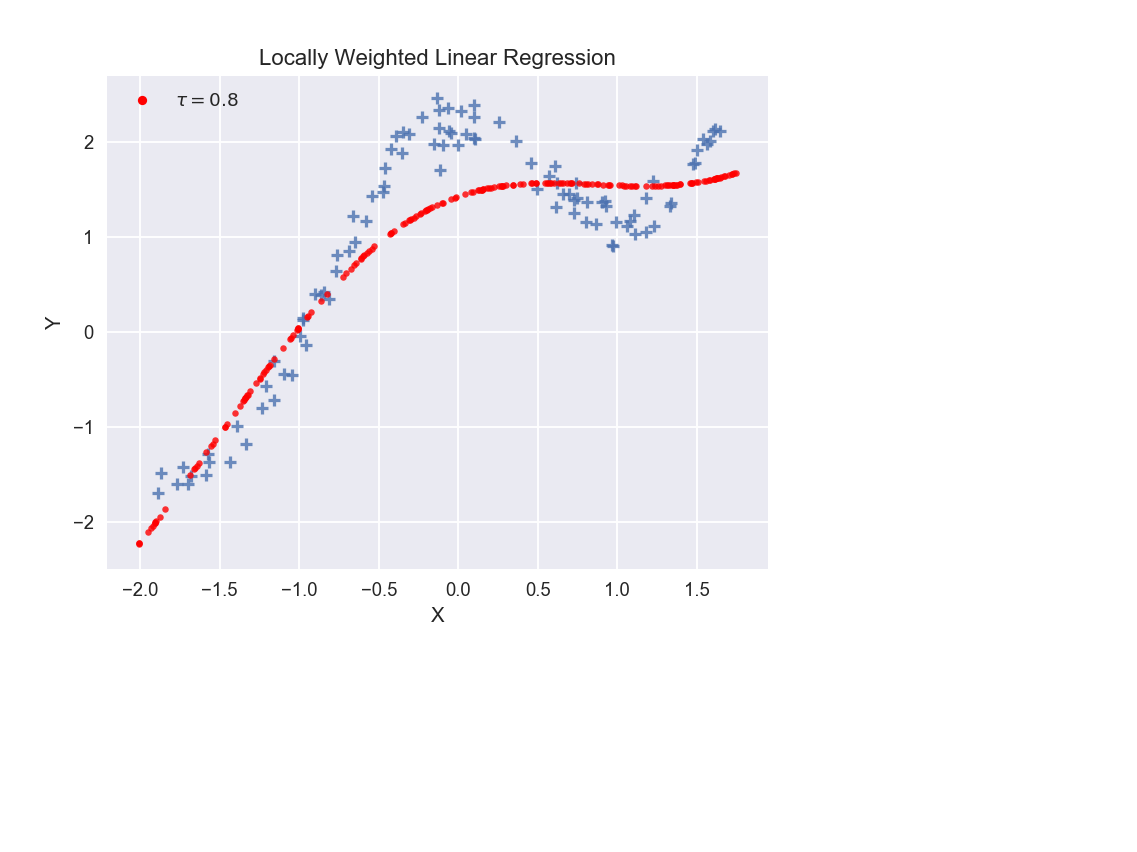

In [5]:
%matplotlib notebook

tau = 0.8

def predict(a,tau):
    w = np.diag(np.exp(-1*(a - x[:,1])**2/(2*tau**2)))
    x_tw = np.dot(x.T,w)
    normal_theta_weighted = np.dot(np.dot(np.linalg.pinv(np.dot(x_tw,x)),x_tw),y)
    return normal_theta_weighted[0] + normal_theta_weighted[1]*a

sns.regplot(x[:,1],y.ravel(),fit_reg=False,marker='+')
axes = plt.gca()
x_bounds = np.array(axes.get_xlim())
x_vals = gen_uniq_floats(x_bounds[0],x_bounds[1],200)
y_vals = np.array([predict(a,tau) for a in x_vals])
sns.regplot(x_vals,y_vals,fit_reg=False,marker='.',color='red')
plt.title("Locally Weighted Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
red_patch = [plt.plot([],[],marker=".",ms=10,ls="",mec=None,color='r',label=r'$\tau = 0.8$')[0]]
plt.legend(handles=red_patch,loc=2)
plt.show()

<IPython.core.display.Javascript object>


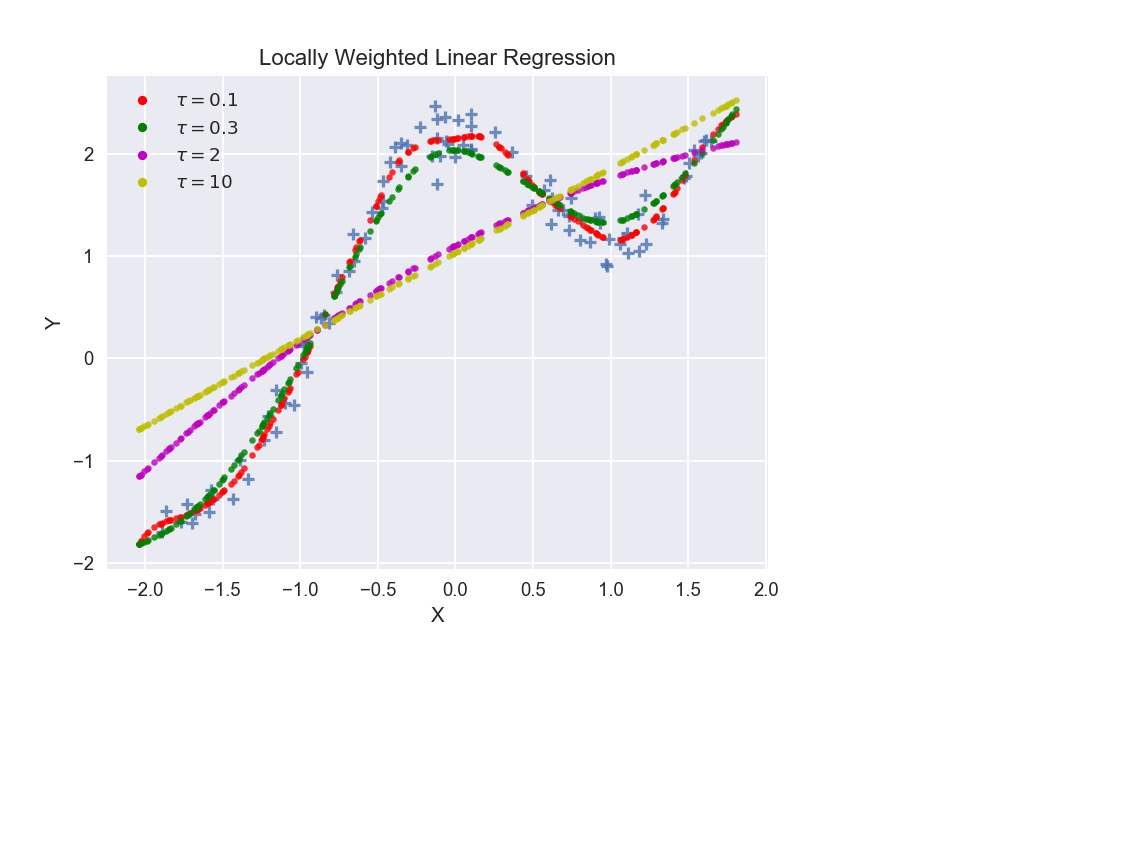

In [6]:
%matplotlib notebook

tau_list = [0.1,0.3,2,10]

ax = sns.regplot(x[:,1],y.ravel(),fit_reg=False,marker='+')
axes = plt.gca()
colors = ['r','g','m','y']
x_bounds = np.array(axes.get_xlim())
x_vals = gen_uniq_floats(x_bounds[0],x_bounds[1],200)
for tau,color in zip(tau_list,colors):
    y_vals = np.array([predict(a,tau) for a in x_vals])
    sns.regplot(x_vals,y_vals,fit_reg=False,marker='.',color=color)
plt.title("Locally Weighted Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
red_patch = mpatches.Patch(color='r', label=r'$\tau = 0.1$')
green_patch = mpatches.Patch(color='g', label=r'$\tau = 0.3$')
magenta_patch = mpatches.Patch(color='m', label=r'$\tau = 2$')
yellow_patch = mpatches.Patch(color='y', label=r'$\tau = 10$')
patches = [plt.plot([],[],marker=".",ms=10,ls="",mec=None,color=colors[i],label=r'$\tau = {0}$'.format(tau_list[i]))[0] for i in range(len(tau_list))]
plt.legend(handles=patches)
plt.show()